In [1]:
# !pip install pandas

In [2]:
import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("news_article_sorting.csv")
data.head()

Text  Category  \
0  world com ex bos launch defence lawyer defendi...  business   
1  german business confidence slide german busine...  business   
2  bbc poll indicates economic gloom citizen majo...  business   
3  lifestyle governs mobile choice faster better ...      tech   
4  enron boss pay eighteen former enron director ...  business   

                                              Tokens  
0  ['world', 'com', 'ex', 'bos', 'launch', 'defen...  
1  ['german', 'business', 'confidence', 'slide', ...  
2  ['bbc', 'poll', 'indicates', 'economic', 'gloo...  
3  ['lifestyle', 'governs', 'mobile', 'choice', '...  
4  ['enron', 'bos', 'pay', 'eighteen', 'former', ...

In [4]:
data.shape

(1490, 3)

In [5]:
y = data.Category

In [6]:
y.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [7]:
sns.countplot(data=data, x='Category')
plt.show()

NameError: name 'sns' is not defined

# Feature Engineering

Feature Engineering is a very key part of Natural Language Processing. as we all know algorithms and machines can’t understand characters or words or sentences hence we need to encode these words into some specific form of numerical in order to interact with algorithms or machines. we can’t feed the text data containing words /sentences/characters to a machine learning model.

There are various ways to perform feature extraction. some popular and mostly used are:-

    1. Bag of Words model
    2. TF-IDF

## 1. Bag of Words model

The idea is to take the whole text data and count their frequency of occurrence. and map the words with their frequency. This method doesn’t care about the order of the words, but it does care how many times a word occurs and the default bag of words model treats all words equally.

## 2. TF-IDF Model

The BOW model doesn’t give good results since it has a drawback. Assume that there is a particular word that is appearing in all the documents and it comes multiple times, eventually, it will have a higher frequency of occurrence and it will have a greater value that will cause a specific word to have more weightage in a sentence, that’s not good for our analysis.

Term frequency (TF): Number of times a term has appeared in a document. The term frequency is a measure of how frequently or how common a word is for a given sentence.

Inverse Document Frequency (IDF): The inverse document frequency (IDF ) is a measure of how rare a word is in a document. Words like “the”,” a” show up in all the documents but rare words will not occur in all the documents of the corpus.

If a word appears in almost every document means it’s not significant for the classification.

IDF of a word is = log(N/n)

N: total number of documents.
n: number of documents containing a term (word)

TF-IDF Evaluates how relevant is a word to its sentence in a collection of sentences or documents.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

TfIdf_Vectorizer = TfidfVectorizer(tokenizer = token.tokenize)

X = TfIdf_Vectorizer.fit_transform(data.Tokens)

X_array = X.toarray()

pd.DataFrame(data=X_array, columns = TfIdf_Vectorizer.get_feature_names_out()).head()

aaa  aac  aaliyah  aamir  aaron   ab  aba  abacus  abandon  abandoned  ...  \
0  0.0  0.0      0.0    0.0    0.0  0.0  0.0     0.0      0.0        0.0  ...   
1  0.0  0.0      0.0    0.0    0.0  0.0  0.0     0.0      0.0        0.0  ...   
2  0.0  0.0      0.0    0.0    0.0  0.0  0.0     0.0      0.0        0.0  ...   
3  0.0  0.0      0.0    0.0    0.0  0.0  0.0     0.0      0.0        0.0  ...   
4  0.0  0.0      0.0    0.0    0.0  0.0  0.0     0.0      0.0        0.0  ...   

   zonealarm  zoom  zorro  zulu  zur  zurich  zutons  zvonareva  zyk   zz  
0        0.0   0.0    0.0   0.0  0.0     0.0     0.0        0.0  0.0  0.0  
1        0.0   0.0    0.0   0.0  0.0     0.0     0.0        0.0  0.0  0.0  
2        0.0   0.0    0.0   0.0  0.0     0.0     0.0        0.0  0.0  0.0  
3        0.0   0.0    0.0   0.0  0.0     0.0     0.0        0.0  0.0  0.0  
4        0.0   0.0    0.0   0.0  0.0     0.0     0.0        0.0  0.0  0.0  

[5 rows x 20531 columns]

In [23]:
X_array.shape

(1490, 20531)

In [24]:
y.shape

(1490,)

In [10]:
# for i in TfIdf_Vectorizer.get_feature_names_out():
#     print(i)

# Model Building

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=40)

## 1. Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

# Check Cross Validation Score

clf = LogisticRegression(random_state=42, max_iter=1000)
np.average(cross_val_score(clf, X, y, cv=10))

0.9664429530201343

In [115]:
# Model Building
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.95      0.99      0.97       107
entertainment       0.98      0.99      0.98        95
     politics       0.99      0.96      0.98        85
        sport       0.97      0.99      0.98       110
         tech       1.00      0.95      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



In [31]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

[[106   0   1   0   0]
 [  1  94   0   0   0]
 [  2   0  82   1   0]
 [  1   0   0 109   0]
 [  1   2   0   2  90]]


### Detect Catagory

In [113]:
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

def detect_catagory(clf, sentence):
    lm = WordNetLemmatizer()
    s =  str(TextBlob(sentence).correct())
    snt = ' '.join([lm.lemmatize(i) for i in s.split()])
    print(clf.predict(TfIdf_Vectorizer.transform([snt])))

In [116]:
detect_catagory(clf, "this is veby interosting subjact. I feel very hapoy to read this")

['sport']


### Get Weight of a word

In [117]:
def get_weight(model, word):
    try:
        print(model.coef_[0][list(TfIdf_Vectorizer.get_feature_names_out()).index(word)])
    except IndexError:
        print(model.coef_.toarray()[0][list(TfIdf_Vectorizer.get_feature_names_out()).index(word)])
    except ValueError:
        pass

In [118]:
get_weight(clf, "interesting")

-0.05571865204710517


## Using L2 Regularizations

In [122]:
clf_l2 = LogisticRegression(penalty="l2", C=50, random_state=42, max_iter=1000)

np.average(cross_val_score(clf_l2, X, y, cv=10))

0.9744966442953021

In [123]:
clf_l2.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=1000, random_state=42)

In [124]:
y_pred_l2 = clf_l2.predict(X_test)

print(classification_report(y_test, y_pred_l2))

               precision    recall  f1-score   support

     business       0.98      0.97      0.98       107
entertainment       0.98      0.99      0.98        95
     politics       0.98      0.98      0.98        85
        sport       0.98      0.99      0.99       110
         tech       0.98      0.97      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



[[104   0   2   0   1]
 [  1  94   0   0   0]
 [  0   0  83   1   1]
 [  1   0   0 109   0]
 [  0   2   0   1  92]]


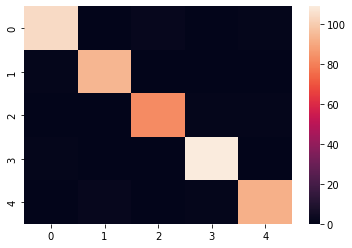

In [125]:
print(confusion_matrix(y_test, y_pred_l2))
sns.heatmap(confusion_matrix(y_test, y_pred_l2))
plt.show()

In [126]:
detect_emotion(clf_l2, "hurrah! today i have cracked my interview. i feel very happy after that.")

['sport']


In [127]:
detect_emotion(clf, "hurrah! today i have cracked my interview. i feel very happy after that.")

['sport']


Accuracy increase but Prediction not perfect.

## Using L1 Regularizations

In [128]:
clf_l1 = LogisticRegression(penalty="l1", C=20, random_state=42, max_iter=1000, solver='liblinear')

np.average(cross_val_score(clf_l1, X, y, cv=10))

0.9583892617449663

In [129]:
clf_l1.fit(X_train, y_train)

LogisticRegression(C=20, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [130]:
y_pred_l1 = clf_l1.predict(X_test)
print(classification_report(y_test, y_pred_l1))

               precision    recall  f1-score   support

     business       0.94      0.97      0.95       107
entertainment       0.97      0.98      0.97        95
     politics       0.97      0.98      0.97        85
        sport       0.96      0.98      0.97       110
         tech       1.00      0.92      0.96        95

     accuracy                           0.97       492
    macro avg       0.97      0.96      0.97       492
 weighted avg       0.97      0.97      0.97       492



[[104   1   2   0   0]
 [  2  93   0   0   0]
 [  2   0  83   0   0]
 [  1   0   1 108   0]
 [  2   2   0   4  87]]


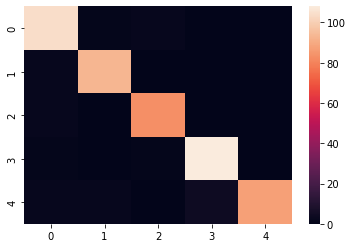

In [131]:
print(confusion_matrix(y_test, y_pred_l1))
sns.heatmap(confusion_matrix(y_test, y_pred_l1))
plt.show()

In [132]:
detect_emotion(clf_l1, "hurrah! today i have cracked my interview. i feel very happy after that.")

['sport']


In [136]:
detect_emotion(clf_l2, "people call me only when they need")

['tech']


Accuracy increase but Prediction not perfect.

# 2. Support Vector Machine

### 1. Linear Kernal

Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is mostly used when there are a Large number of Features in a particular Data Set. One of the examples where there are a lot of features, is Text Classification, as each alphabet is a new feature. So we mostly use Linear Kernel in Text Classification

In [137]:
from sklearn import svm

svc_linear = svm.SVC(kernel ='linear', C = 1)
svc_linear.fit(X_train, y_train)

y_pred = svc_linear.predict(X_test)

accuracy_score(y_pred, y_test)

0.9796747967479674

In [141]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.97      0.98      0.98       107
entertainment       0.97      0.99      0.98        95
     politics       0.98      0.98      0.98        85
        sport       0.99      0.99      0.99       110
         tech       0.99      0.96      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



[[105   0   2   0   0]
 [  1  94   0   0   0]
 [  1   0  83   0   1]
 [  1   0   0 109   0]
 [  0   3   0   1  91]]


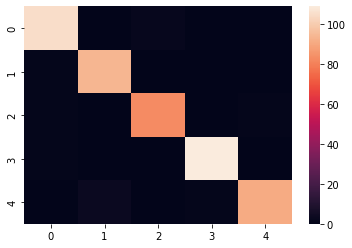

In [142]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

### 2. Polynomial Kernal

In [143]:
# from sklearn import svm

# svc_poly = svm.SVC(kernel ='poly', C = 1)
# svc_poly.fit(X_train, y_train)

# y_pred = svc_poly.predict(X_test)

# accuracy_score(y_pred, y_test)

In [144]:
# detect_emotion(svc_poly, "today i got very excited after geting this offer")

# 3. Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(max_depth=10, random_state=18)

rfc1.fit(X_train, y_train)
y_predicted = rfc1.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.959349593495935


In [146]:
rfc2 = RandomForestClassifier(max_depth=20, random_state=25)

rfc2.fit(X_train, y_train)
y_predicted = rfc2.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9634146341463414


In [147]:
rfc3 = RandomForestClassifier(max_depth=50, random_state=38)

rfc3.fit(X_train, y_train)
y_predicted = rfc3.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9613821138211383


In [148]:
rfc4 = RandomForestClassifier(max_depth=100, random_state=80)

rfc4.fit(X_train, y_train)
y_predicted = rfc4.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.967479674796748


In [149]:
rfc5 = RandomForestClassifier(max_depth=200, random_state=150)

rfc5.fit(X_train, y_train)
y_predicted = rfc5.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9634146341463414


In [150]:
rfc6 = RandomForestClassifier(max_depth=300, random_state=280)

rfc6.fit(X_train, y_train)
y_predicted = rfc6.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9695121951219512


In [151]:
rfc7 = RandomForestClassifier(max_depth=400, random_state=320)

rfc7.fit(X_train, y_train)
y_predicted = rfc7.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9634146341463414


In [152]:
rfc8 = RandomForestClassifier(max_depth=800, random_state=500)

rfc8.fit(X_train, y_train)
y_predicted = rfc8.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9654471544715447


In [153]:
rfc9 = RandomForestClassifier(max_depth=500, random_state=480)

rfc9.fit(X_train, y_train)
y_predicted = rfc9.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9613821138211383


In [154]:
np.average(cross_val_score(rfc8, X, y, cv=10))

0.9583892617449665

In [155]:
detect_emotion(rfc8, "hurrah! today i have cracked my interview. i feel very happy after that.")

['sport']


In [156]:
detect_emotion(rfc8, "people call me only when they need")

['business']


# 4. K Nearest Neighbors

Accuracy : 0.9004065040650406
               precision    recall  f1-score   support

     business       0.84      0.92      0.88       107
entertainment       0.92      0.92      0.92        95
     politics       0.82      0.94      0.88        85
        sport       0.99      0.88      0.93       110
         tech       0.95      0.85      0.90        95

     accuracy                           0.90       492
    macro avg       0.90      0.90      0.90       492
 weighted avg       0.91      0.90      0.90       492

[[98  1  6  1  1]
 [ 5 87  1  0  2]
 [ 4  0 80  0  1]
 [ 7  2  4 97  0]
 [ 3  5  6  0 81]]


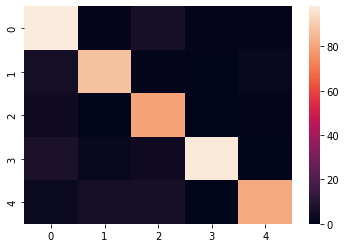

In [157]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Accuracy :",accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

# 5. Naive Bayes


1. Gaussian Naive Bayes
2. Multinomial Naive Bayes
3. Complement Naive Bayes
4. Bernoulli Naive Bayes
5. Categorical Naive Bayes
6. Out-of-core naive Bayes model fitting


### 1. Gaussian Naive Bayes

Accuracy : 0.9085365853658537
               precision    recall  f1-score   support

     business       0.87      0.84      0.86       107
entertainment       0.89      0.97      0.93        95
     politics       0.93      0.91      0.92        85
        sport       0.96      0.93      0.94       110
         tech       0.89      0.91      0.90        95

     accuracy                           0.91       492
    macro avg       0.91      0.91      0.91       492
 weighted avg       0.91      0.91      0.91       492

[[ 90   4   4   3   6]
 [  1  92   0   0   2]
 [  4   2  77   0   2]
 [  5   1   1 102   1]
 [  3   4   1   1  86]]


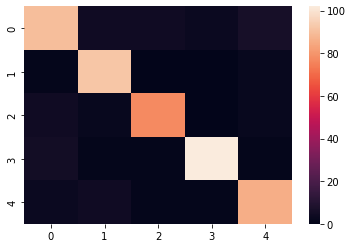

In [158]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_predicted = gnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

print(confusion_matrix(y_test, y_predicted))
sns.heatmap(confusion_matrix(y_test, y_predicted))
plt.show()

### 2. Multinomial Naive Bayes


Accuracy : 0.9715447154471545
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       107
entertainment       0.99      0.97      0.98        95
     politics       0.93      0.96      0.95        85
        sport       0.97      0.99      0.98       110
         tech       1.00      0.95      0.97        95

     accuracy                           0.97       492
    macro avg       0.97      0.97      0.97       492
 weighted avg       0.97      0.97      0.97       492

[[105   0   2   0   0]
 [  1  92   2   0   0]
 [  2   0  82   1   0]
 [  1   0   0 109   0]
 [  0   1   2   2  90]]


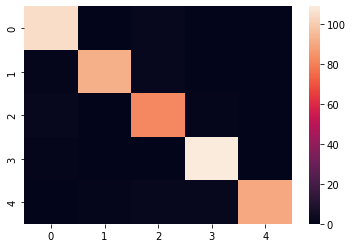

In [159]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train.toarray(), y_train)
y_predicted = mnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

print(confusion_matrix(y_test, y_predicted))
sns.heatmap(confusion_matrix(y_test, y_predicted))
plt.show()

### 3. Complement Naive Bayes

In [13]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_predicted = cnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

print(confusion_matrix(y_test, y_predicted))
# sns.heatmap(confusion_matrix(y_test, y_predicted))
# plt.show()

Accuracy : 0.9796747967479674
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       107
entertainment       0.99      0.98      0.98        95
     politics       0.95      0.99      0.97        85
        sport       0.99      0.99      0.99       110
         tech       0.98      0.98      0.98        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492

[[103   0   3   0   1]
 [  1  93   1   0   0]
 [  0   0  84   0   1]
 [  1   0   0 109   0]
 [  0   1   0   1  93]]


### 4. Bernoulli Naive Bayes

In [162]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_predicted = bnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

print(confusion_matrix(y_test, y_predicted))
sns.heatmap(confusion_matrix(y_test, y_predicted))
plt.show()

Accuracy : 0.9390243902439024
               precision    recall  f1-score   support

     business       0.82      0.99      0.89       107
entertainment       0.98      0.97      0.97        95
     politics       0.97      0.87      0.92        85
        sport       0.99      0.99      0.99       110
         tech       0.99      0.85      0.92        95

     accuracy                           0.94       492
    macro avg       0.95      0.93      0.94       492
 weighted avg       0.95      0.94      0.94       492

[[106   0   1   0   0]
 [  1  92   1   0   1]
 [ 11   0  74   0   0]
 [  1   0   0 109   0]
 [ 11   2   0   1  81]]


### 5. Categorical Naive Bayes


Accuracy : 0.22357723577235772
               precision    recall  f1-score   support

     business       0.00      0.00      0.00       107
entertainment       0.00      0.00      0.00        95
     politics       0.00      0.00      0.00        85
        sport       0.22      1.00      0.37       110
         tech       0.00      0.00      0.00        95

     accuracy                           0.22       492
    macro avg       0.04      0.20      0.07       492
 weighted avg       0.05      0.22      0.08       492

[[  0   0   0 107   0]
 [  0   0   0  95   0]
 [  0   0   0  85   0]
 [  0   0   0 110   0]
 [  0   0   0  95   0]]


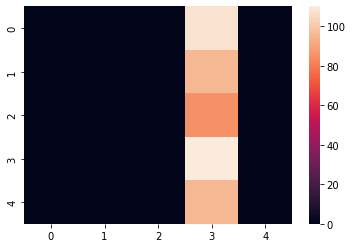

In [169]:
from sklearn.naive_bayes import CategoricalNB

ctnb = CategoricalNB()
ctnb.fit(X_train.toarray(), y_train)
y_predicted = ctnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

print(confusion_matrix(y_test, y_predicted))
sns.heatmap(confusion_matrix(y_test, y_predicted))
plt.show()

In [166]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import re
from bs4 import BeautifulSoup
import string
from nltk.stem import WordNetLemmatizer

def detect_mental_health(model, sentence):

    # make smallercase
    sentence = sentence.lower()
        
    # remove emails
    sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

    # remove mentions
    sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)
    
    # Remove html
    sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()
    
    # Remove URL
    sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)
        
    # Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    
    # Remove non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

    # Spliting words into two meaningful word
    sentence = ' '.join(wn.split(str(sentence)))

    # Correct the sentence
    sentence =  str(TextBlob(sentence).correct())
    
    # decontracted
    
    ## specific
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    #sentence = re.sub(r"\re", " are", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = ' '.join([lm.lemmatize(i) for i in sentence.split()])
    print(snt)
    
    return model.predict(TfIdf_Vectorizer.transform([snt]))[0]

In [21]:
detect_mental_health(cnb, "happybirthdayyy Helloworld World4646 http://hello.c ac@gmail.com")

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

## Save Model

In [15]:
import pickle as pk

In [16]:
with open("cnb.pk", "wb") as f:
    pk.dump(cnb, f)

In [17]:
with open("cnb.pk", "rb") as f:
    Y = pk.load(f)

In [18]:
detect_mental_health(Y, "happybirthdayyy Helloworld World4646 http://hello.c ac@gmail.com")

NameError: name 'detect_mental_health' is not defined

In [180]:
with open("TfIdf_Vectorizer.pk", "wb") as f:
    pk.dump(TfIdf_Vectorizer, f)

In [183]:
with open("TfIdf_Vectorizer.pk", "rb") as f:
    pk.load(f)